In [ ]:
PATH_TO_CSV = '/home/mehdi/minecraft-copilot-ml/output/lightning_logs/version_0/metrics.csv'
PATH_TO_MODEL = '/home/mehdi/minecraft-copilot-ml/output/last_model.pth'

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(PATH_TO_CSV)
df.columns

In [ ]:
from seaborn import lineplot

lineplot(data=df, x='epoch', y='train_loss_epoch', label='train_loss_epoch')
lineplot(data=df, x='epoch', y='val_loss_epoch', label='val_loss_epoch')

In [ ]:
from torch import load
import numpy as np

model = load(PATH_TO_MODEL)
block_dict = model.unique_blocks_dict
random_map = np.random.randint(0, len(block_dict), (16, 16, 16))
random_map = np.vectorize(block_dict.get)(random_map)
random_map = np.expand_dims(random_map, axis=0)
res = model(random_map)


In [ ]:
import torch

In [ ]:
torch.cuda.get_device_name(0)

In [ ]:

import numpy as np
a = np.arange(4* 4* 4).reshape(4, 4, 4)
np.unique(a, return_counts=True)

In [ ]:
import torch

val = torch.rand(2, 12, 16, 16, 16)
pred = torch.rand(2, 12, 16, 16, 16)

from torch.nn.functional import cross_entropy, softmax

res = cross_entropy(softmax(pred, dim=1), val, reduction="none")
res2 = cross_entropy(pred, val, reduction="none")
res == res2

In [ ]:
from torch import nn

ct = nn.ConvTranspose3d(12, 12, 3, stride=2, padding=1, output_padding=1)
inop = torch.rand(2, 12, 16, 16, 16)
out = ct(inop)
out.shape

In [ ]:
from minecraft_copilot_ml.data_loader import nbt_to_numpy_minecraft_map

nbt_to_numpy_minecraft_map('/home/mehdi/minecraft-copilot-ml/datasets/minecraft_schematics/18925.litematic')

In [ ]:
import gc
from pathlib import Path
import re
import nbtlib
import numpy as np
from minecraft_copilot_ml.minecraft_pre_flattening_id import default_palette
from loguru import logger
import json
import litemapy
from tqdm import tqdm

nbt_file = "/home/mehdi/minecraft-copilot-ml/datasets/minecraft_schematics/20778.litematic"
nbt_loaded = litemapy.Schematic.load(nbt_file)
regions = nbt_loaded.regions
first_region = regions[list(regions.keys())[0]]
width_start = first_region.x
width_end = first_region.x + first_region.width
width_step = 1 if first_region.width > 0 else -1

reg = first_region

# Print out the basic shape
numpy_map = np.zeros((len(reg.xrange()), len(reg.yrange()), len(reg.zrange())), dtype=object)
print(reg.xrange(), reg.yrange(), reg.zrange())
print(len(reg.xrange()), len(reg.yrange()), len(reg.zrange()))
for x, i in zip(reg.xrange(), range(len(reg.xrange()))):
    for y, j in zip(reg.yrange(), range(len(reg.yrange()))):
        for z, k in zip(reg.zrange(), range(len(reg.zrange()))):
            b = reg.getblock(x, y, z)
            numpy_map[i, j, k] = b.blockid

In [ ]:
set(numpy_map.flatten())

In [ ]:
import numpy as np
np.random.randint(0, 8)

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
data = np.random.random((50, 50, 50))

fig, ax = plt.subplots()

for i, img in enumerate(data):
    ax.clear()
    ax.imshow(img)
    ax.set_title(f"frame {i}")
    # Note that using time.sleep does *not* work here!
    plt.pause(0.1)

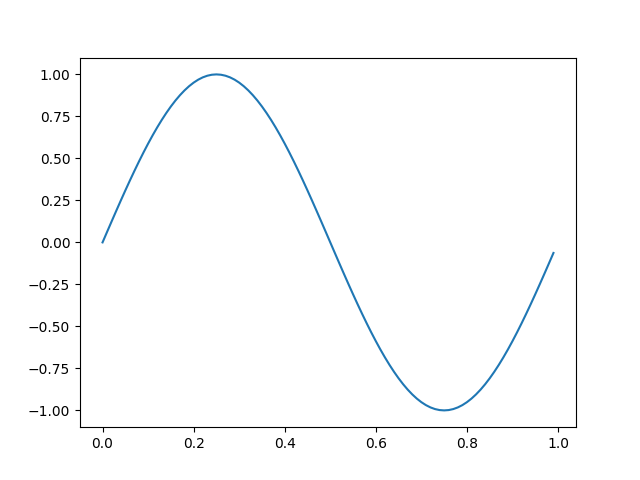

data coords 0.8067701612903226 0.591666666666667, pixel coords 470 337
data coords 0.8067701612903226 0.5380952380952384, pixel coords 470 328
data coords 0.8045745967741935 0.5380952380952384, pixel coords 469 328
data coords 0.7518810483870968 0.5380952380952384, pixel coords 445 328
data coords 0.7299254032258066 0.5380952380952384, pixel coords 435 328
data coords 0.6969919354838711 0.5321428571428575, pixel coords 420 327
data coords 0.628929435483871 0.5380952380952384, pixel coords 389 328
data coords 0.624538306451613 0.216666666666667, pixel coords 387 274
data coords 0.6091693548387097 0.22857142857142887, pixel coords 380 276
data coords 0.554280241935484 0.2880952380952384, pixel coords 355 286
data coords 0.5147600806451613 0.31190476190476213, pixel coords 337 290
data coords 0.47304435483870977 0.3178571428571433, pixel coords 318 291
data coords 0.4137641129032259 0.3178571428571433, pixel coords 291 291
data coords 0.3698528225806452 0.3178571428571433, pixel coords 27

In [21]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.backend_bases import MouseButton

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2 * np.pi * t)
fig, ax = plt.subplots()
ax.plot(t, s)


def on_move(event):
    if event.inaxes:
        print(f'data coords {event.xdata} {event.ydata},',
              f'pixel coords {event.x} {event.y}')


def on_click(event):
    if event.button is MouseButton.LEFT:
        print('disconnecting callback')
        plt.disconnect(binding_id)


binding_id = plt.connect('motion_notify_event', on_move)
plt.connect('button_press_event', on_click)

plt.show()